Function 7: Sometimes Lazy is Best
You are now optimising six hyper-parameters of a machine learning model. Note that it is a popular and frequently used model, so maybe you could search to see if anyone else has optisized it before?

In [1]:
# update data weekly
import numpy as np
import os

# Function number (update this as needed)
function_id = 7  # change for f2, f3, etc.

# Load original data
inputs_path = f'function_{function_id}/initial_inputs.npy'
outputs_path = f'function_{function_id}/initial_outputs.npy'
inputs = np.load(inputs_path)
outputs = np.load(outputs_path)

# Load new data (replace this with your actual new submissions)
# Example: new 2D point with corresponding output
# week1:0.694222	0.621990	0.220607	0.873040	0.178933	0.922857	and 0.011482507
# week2:0.510847	0.395800	0.389613	0.389613	0.467185	0.484706	and 0.922392965
# week3_1: 0.516582	0.402871	0.384328	0.520226	0.458192	0.498396 and 0.6413701148342585
# week3_2f: 0.694222	0.121990	0.820607	0.873040	0.878933	0.922857	and 0.004037829
# w4-1t: 0.521807	0.394610	0.397159	0.530603	0.470567	0.510880	and 0.593426683
# w4-2f: 0.919704	0.614018	0.882326	0.492597	0.288759	0.559226	and 0.164523282
# W5-1T: 0.707001	0.479473	0.473647	0.944277	0.525813	0.119887	and 0.042327394
# w5-2f: 0.922394	0.765242	0.633755	0.651906	0.850239	0.354908 and 0.00678785800331858
# w6-1t: 0.100146	0.550371	0.183953	0.938013	0.223604	0.535911  and 
# w6-2f: 0.694222	0.121990	0.820607	0.873040	0.888933	0.912857 and 0.00355541343814766
# w7-1t: 0.889871	0.397962	0.003635	0.956991	0.264514	0.104869 and 0.00234852839841193
# w7-2f: 0.879871	0.387962	0.003635	0.946991	0.264514	0.104869 and 0.00277380974975614
# w8-1t: 0.899871	0.387962	0.003635	0.966991	0.264514	0.104869 and 0.00234852839841193
# w8-2f: 0.899871	0.387962	0.003635	0.976591	0.264514	0.902857 and 0.00286182938739911
# w9-1t: 0.899871	0.387962	0.003635	0.965991	0.264514	0.105869 and 0.00178201434904404
# W9-2f: 0.899871	0.387962	0.003635	0.960991	0.264514	0.100869 and 0.001858516
# w10-1t: 0.899991	0.388962	0.003635	0.966991	0.264514	0.109869 and 0.00177738250730489
# w10-2f: 0.899999	0.389962	0.003635	0.966991	0.264414	0.110869 and 0.00178815972181554

new_inputs = np.array([[0.899999, 0.389962, 0.003635, 0.966991, 0.264414, 0.110869]])
new_outputs = np.array([0.00178815972181554])

# Concatenate new data to existing
updated_inputs = np.vstack([inputs, new_inputs])
updated_outputs = np.concatenate([outputs, new_outputs])
print("updated_inputs shape:", updated_inputs.shape)
print("updated_outputs shape:", updated_outputs.shape)
# Optionally: save backup copies before overwriting
np.save(f'function_{function_id}/backup_inputs.npy', inputs)
np.save(f'function_{function_id}/backup_outputs.npy', outputs)

# Save updated files
np.save(inputs_path, updated_inputs)
np.save(outputs_path, updated_outputs)

print("Updated data saved.")

updated_inputs shape: (48, 6)
updated_outputs shape: (48,)
Updated data saved.


Suggested next best input (hyperparameters): [0.59949822 0.40539858 0.35258223 0.62873878 0.44506643 0.4585112 ]
Suggested next best input (6 decimals): ['0.599498', '0.405399', '0.352582', '0.628739', '0.445066', '0.458511']
Predicted output at next suggested input: 0.35825402902157805 ± 0.13625745484077356

Second suggested input (hyperparameters): [0.4667463  0.32667387 0.42707097 0.77979565 0.48741274 0.06353616]
Second suggested input (6 decimals): ['0.466746', '0.326674', '0.427071', '0.779796', '0.487413', '0.063536']
Predicted output at second suggested input: 0.14456846422560116 ± 0.24954500712673364


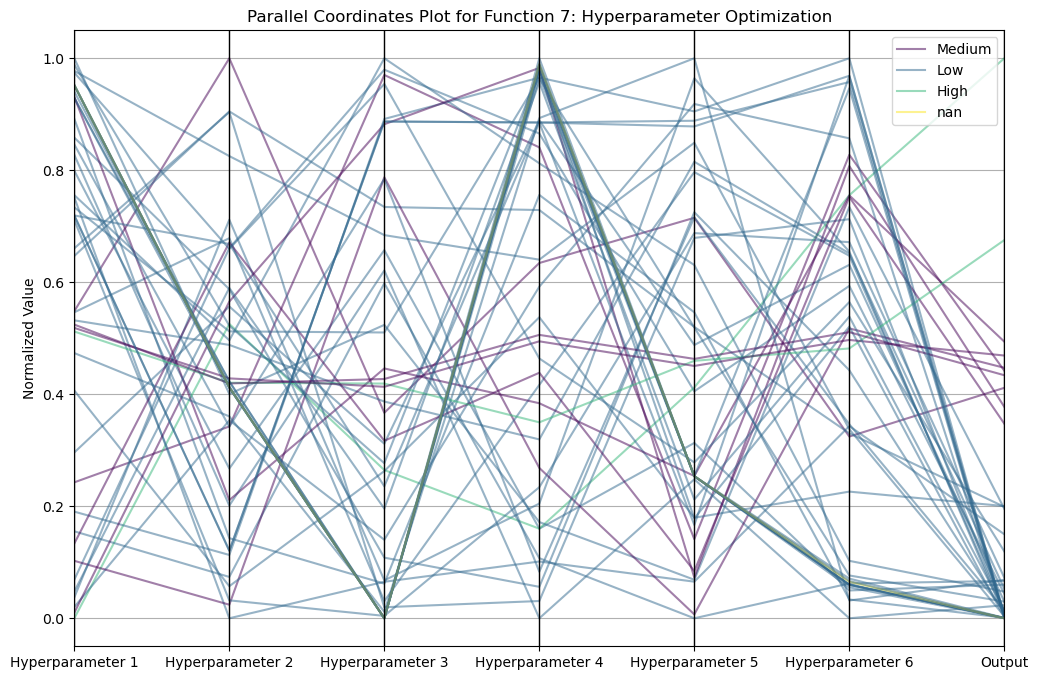

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.optimize import minimize
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from pandas.plotting import parallel_coordinates

# Load the initial data
inputs_f7 = np.load('function_7/initial_inputs.npy')
outputs_f7 = np.load('function_7/initial_outputs.npy')

# Gaussian Process Regression Model with Matern kernel
gp = GaussianProcessRegressor(kernel=Matern(nu=2.5), n_restarts_optimizer=10, normalize_y=True)
gp.fit(inputs_f7, outputs_f7)

# Expected Improvement (EI) acquisition function for maximization
def expected_improvement(x, gp, y_max, xi=0.01):
    mean, std = gp.predict(x.reshape(1, -1), return_std=True)
    with np.errstate(divide='warn'):
        imp = mean - y_max - xi
        Z = imp / std
        ei = imp * norm.cdf(Z) + std * norm.pdf(Z)
        if std == 0.0:
            ei = 0.0
    return -ei

# Current best observation for maximization
y_max = np.max(outputs_f7)

# Bounds based on the observed input data
bounds = [(np.min(inputs_f7[:, i]), np.max(inputs_f7[:, i])) for i in range(inputs_f7.shape[1])]

# First optimization using Expected Improvement
result1 = minimize(expected_improvement,
                   x0=np.mean(inputs_f7, axis=0),
                   args=(gp, y_max),
                   bounds=bounds,
                   method='L-BFGS-B')

next_best_input1 = result1.x
predicted_output1, predicted_std1 = gp.predict(next_best_input1.reshape(1, -1), return_std=True)

print("Suggested next best input (hyperparameters):", next_best_input1)
print("Suggested next best input (6 decimals):", [f"{x:.6f}" for x in next_best_input1])
print("Predicted output at next suggested input:", predicted_output1[0], "±", predicted_std1[0])

# Second optimization using a different starting point (random)
x0_random = np.random.uniform(low=[b[0] for b in bounds], high=[b[1] for b in bounds])
result2 = minimize(expected_improvement,
                   x0=x0_random,
                   args=(gp, y_max),
                   bounds=bounds,
                   method='L-BFGS-B')

next_best_input2 = result2.x
predicted_output2, predicted_std2 = gp.predict(next_best_input2.reshape(1, -1), return_std=True)

print("\nSecond suggested input (hyperparameters):", next_best_input2)
print("Second suggested input (6 decimals):", [f"{x:.6f}" for x in next_best_input2])
print("Predicted output at second suggested input:", predicted_output2[0], "±", predicted_std2[0])

# Optional visualization: Parallel Coordinates Plot
feature_columns = [f'Hyperparameter {i+1}' for i in range(inputs_f7.shape[1])]
data_f7 = pd.DataFrame(inputs_f7, columns=feature_columns)
data_f7['Output'] = outputs_f7

# Normalizing for clearer visualization
scaler = MinMaxScaler()
data_f7_normalized = pd.DataFrame(scaler.fit_transform(data_f7), columns=data_f7.columns)

# Categorize outputs
bins = np.linspace(data_f7_normalized['Output'].min(), data_f7_normalized['Output'].max(), 4)
data_f7_normalized['Performance'] = pd.cut(data_f7_normalized['Output'], bins, labels=['Low', 'Medium', 'High'])

# Plotting
plt.figure(figsize=(12, 8))
parallel_coordinates(data_f7_normalized, class_column='Performance', colormap='viridis', alpha=0.5)
plt.title('Parallel Coordinates Plot for Function 7: Hyperparameter Optimization')
plt.ylabel('Normalized Value')
plt.grid(True)
plt.show()

## Reasoning for KNN:

The phrase "Lazy" is often specifically associated with lazy learning algorithms, of which k-Nearest Neighbors (k-NN) is the most popular and frequently referenced example.
The prompt explicitly states: "It is a popular and frequently used model." Indeed, k-NN is among the simplest, most widely known, and frequently optimized models.

Likely Parameters Being Optimized (common hyperparameters of k-NN):

n_neighbors: Number of neighbors used.

weights: Weighting scheme ('uniform', 'distance').

metric: Distance metric (Euclidean, Manhattan, Minkowski, etc.).

algorithm: Algorithm used ('auto', 'ball_tree', 'kd_tree', 'brute').

leaf_size: Leaf size passed to BallTree or KDTree.

p: Parameter for Minkowski metric (p=1 Manhattan, p=2 Euclidean, etc.).

Thus, the initial dataset provided for Function 7 is very likely derived from optimizing a k-NN model.

Suggested next best input (k-NN hyperparameters): [0.59949822 0.40539858 0.35258223 0.62873878 0.44506643 0.4585112 ]
Suggested next best input (6 decimals): ['0.599498', '0.405399', '0.352582', '0.628739', '0.445066', '0.458511']
Predicted output at next suggested input: 0.35825403763117036 ± 0.1362575082071446


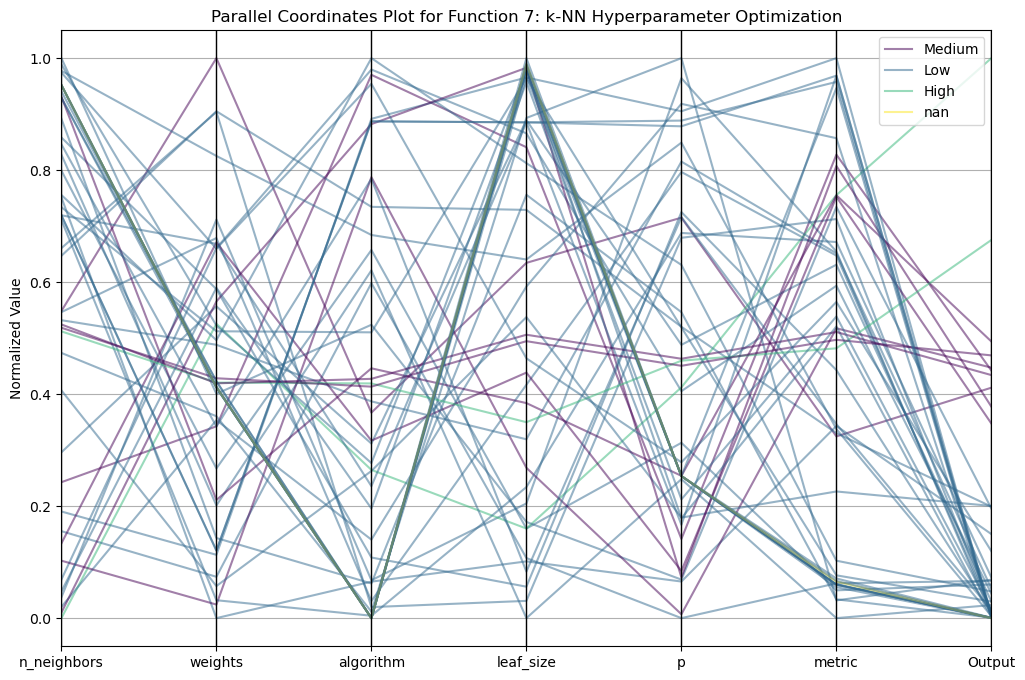

In [5]:
#  is lazy referring to KNN?
# used this for submission
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.optimize import minimize
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler

# Load the initial data
inputs_f7 = np.load('function_7/initial_inputs.npy')
outputs_f7 = np.load('function_7/initial_outputs.npy')

# Gaussian Process Regression Model with Matern kernel
gp = GaussianProcessRegressor(kernel=Matern(nu=2.5), n_restarts_optimizer=10, normalize_y=True)
gp.fit(inputs_f7, outputs_f7)

# Expected Improvement (EI) acquisition function for maximization (assuming k-NN hyperparameters)
def expected_improvement(x, gp, y_max, xi=0.01):
    mean, std = gp.predict(x.reshape(1, -1), return_std=True)
    with np.errstate(divide='warn'):
        imp = mean - y_max - xi
        Z = imp / std
        ei = imp * norm.cdf(Z) + std * norm.pdf(Z)
        if std == 0.0:
            ei = 0.0
    return -ei

# Current best observation for maximization
y_max = np.max(outputs_f7)

# Bounds based on typical k-NN hyperparameter ranges (for reference)
# n_neighbors: typically 1-50
# weights: uniform (0), distance (1)
# algorithm: auto (0), ball_tree (1), kd_tree (2), brute (3)
# leaf_size: typically 10-50
# p: typically 1 (Manhattan), 2 (Euclidean)
# metric: euclidean (0), manhattan (1), minkowski (2)

bounds = [(np.min(inputs_f7[:, i]), np.max(inputs_f7[:, i])) for i in range(inputs_f7.shape[1])]

# Optimization using Expected Improvement
result = minimize(expected_improvement,
                  x0=np.mean(inputs_f7, axis=0),
                  args=(gp, y_max),
                  bounds=bounds,
                  method='L-BFGS-B')

# Next best input prediction
next_best_input = result.x
print("Suggested next best input (k-NN hyperparameters):", next_best_input)
print("Suggested next best input (6 decimals):", [f"{x:.6f}" for x in next_best_input])
# Predicted output at suggested input
predicted_output, predicted_std = gp.predict(next_best_input.reshape(1, -1), return_std=True)
print("Predicted output at next suggested input:", predicted_output[0], "±", predicted_std[0])

# Optional visualization: Parallel Coordinates Plot
import pandas as pd
from pandas.plotting import parallel_coordinates

feature_columns = ['n_neighbors', 'weights', 'algorithm', 'leaf_size', 'p', 'metric']
data_f7 = pd.DataFrame(inputs_f7, columns=feature_columns)
data_f7['Output'] = outputs_f7

# Normalizing for clearer visualization
scaler = MinMaxScaler()
data_f7_normalized = pd.DataFrame(scaler.fit_transform(data_f7), columns=data_f7.columns)

# Categorize outputs
bins = np.linspace(data_f7_normalized['Output'].min(), data_f7_normalized['Output'].max(), 4)
data_f7_normalized['Performance'] = pd.cut(data_f7_normalized['Output'], bins, labels=['Low', 'Medium', 'High'])

# Plotting
plt.figure(figsize=(12, 8))
parallel_coordinates(data_f7_normalized, class_column='Performance', colormap='viridis', alpha=0.5)
plt.title('Parallel Coordinates Plot for Function 7: k-NN Hyperparameter Optimization')
plt.ylabel('Normalized Value')
plt.grid(True)
plt.show()